In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

In [111]:
polymer="PVMPT"
solution="EC_DMC_LiPF6"
percent="0_Percent"
temp="300K"


name=f"{polymer}-{solution}"
print(name)
data_path=f"/Volumes/project/depablo/mleyf3/DMREF/{name}/{percent}_0_SoC"

if polymer == "PVMPT":
    data_path=f"/Volumes/project/depablo/mleyf3/DMREF/PVMPT_Simulations/{name}/{percent}_0_SoC"

if percent == "0_Percent":
    data_path=f"/Volumes/project/depablo/mleyf3/DMREF/{polymer}/{polymer}_n30"

print(data_path)


PVMPT-EC_DMC_LiPF6
/Volumes/project/depablo/mleyf3/DMREF/PVMPT/PVMPT_n30


0_Percent PVMPT EC_DMC_LiPF6 - 300K
------------------
Combined average (last 40 ns) = 3.55119
Error bar (std dev) = 0.03535


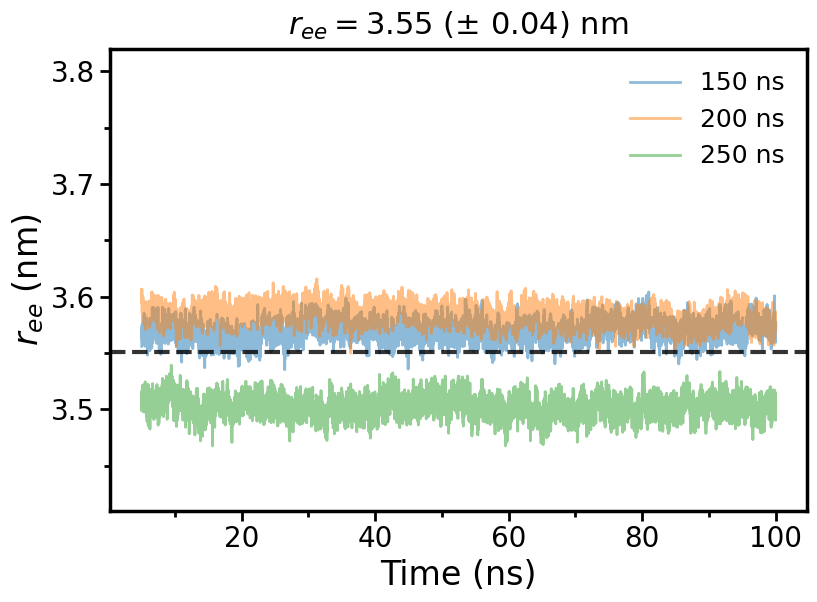

In [112]:
timing=[150, 200, 250]

averages = []

fig, ax = plt.subplots(figsize=(9, 6))

for t in timing:
    polystat = np.genfromtxt(
        [i for i in open(f'{data_path}/cool/cool_from_{t}ns/rg_backbone_{temp}_from_{t}ns.xvg').read().splitlines() if not i.startswith(('#', '@'))]
    )[502:]
    time = polystat.T[0]

    last_40ns_mask = time >= (time[-1] - 40000)
    last_40ns_polystat = polystat[last_40ns_mask, 1]

    avg_polystat = np.mean(last_40ns_polystat)
    averages.append(avg_polystat)

    # Optional: plot each trajectory
    ax.plot(polystat.T[0] / 1000, polystat.T[1],
            label=f"{t} ns",
            alpha=0.5, lw=2)

# Calculate combined average and error bar (std dev of the three averages)
combined_avg = np.mean(averages)
combined_std = np.std(averages)

ax.axhline(combined_avg, 
           #label = f"{combined_avg:0.2f} kg/m$^3$", 
           c="k", ls="--", lw=3, alpha = 0.8)

ax.set_xlabel("Time (ns)", fontsize=24)
ax.set_ylabel(r"$r_{ee}$ (nm)", fontsize=24)
ax.set_ylim(3.41, 3.82)
ax.set_title(r"$r_{ee} = $"+f"{combined_avg:0.2f} (± {combined_std:0.2f}) nm",
             pad=10,
             fontsize=22)

ax.legend(fontsize=18, 
          #bbox_to_anchor=(1, 0.5),
          frameon=False)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))

ax.tick_params(axis='both', width=2.0, length=7, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2.0, length=4)

plt.savefig(f'/Users/mleyf/Documents/DMREF/Backbone study/Figures/{polymer}/e2e_{percent}_{temp}.png', bbox_inches='tight', dpi=300)
print(f"{percent} {polymer} {solution} - {temp}")
print("------------------")
print(f"Combined average (last 40 ns) = {combined_avg:.5f}")
print(f"Error bar (std dev) = {combined_std:.5f}")


0_Percent PVMPT EC_DMC_LiPF6 - 300K
------------------
Combined average (last 40 ns) = 1.30558
Error bar (std dev) = 0.01131


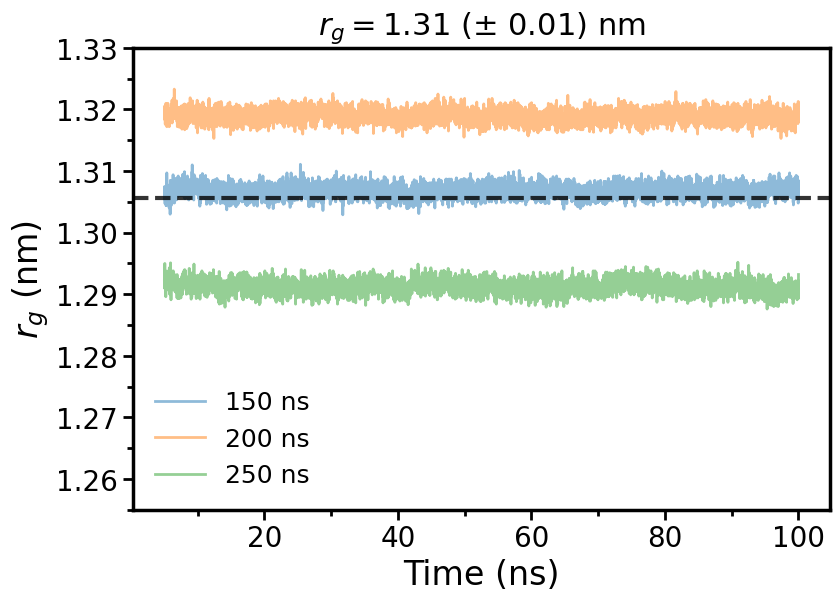

In [115]:
timing=[150, 200, 250]

averages = []

fig, ax = plt.subplots(figsize=(9, 6))

for t in timing:
    polystat = np.genfromtxt(
        [i for i in open(f'{data_path}/cool/cool_from_{t}ns/rg_backbone_{temp}_from_{t}ns.xvg').read().splitlines() if not i.startswith(('#', '@'))]
    )[502:]
    time = polystat.T[0]

    last_40ns_mask = time >= (time[-1] - 40000)
    last_40ns_polystat = polystat[last_40ns_mask, 2]

    avg_polystat = np.mean(last_40ns_polystat)
    averages.append(avg_polystat)

    # Optional: plot each trajectory
    ax.plot(polystat.T[0] / 1000, polystat.T[2],
            label=f"{t} ns",
            alpha=0.5, lw=2)

# Calculate combined average and error bar (std dev of the three averages)
combined_avg = np.mean(averages)
combined_std = np.std(averages)

ax.axhline(combined_avg, 
           #label = f"{combined_avg:0.2f} kg/m$^3$", 
           c="k", ls="--", lw=3, alpha = 0.8)

ax.set_xlabel("Time (ns)", fontsize=24)
ax.set_ylabel(r"$r_{g}$ (nm)", fontsize=24)
ax.set_ylim(1.255, 1.33)
ax.set_title(r"$r_{g} = $"+f"{combined_avg:0.2f} (± {combined_std:0.2f}) nm",
             pad=10,
             fontsize=22)

ax.legend(fontsize=18, 
          #bbox_to_anchor=(1, 0.5),
          frameon=False)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))

ax.tick_params(axis='both', width=2.0, length=7, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2.0, length=4)

plt.savefig(f'/Users/mleyf/Documents/DMREF/Backbone study/Figures/{polymer}/rg_{percent}_{temp}.png', bbox_inches='tight', dpi=300)
print(f"{percent} {polymer} {solution} - {temp}")
print("------------------")
print(f"Combined average (last 40 ns) = {combined_avg:.5f}")
print(f"Error bar (std dev) = {combined_std:.5f}")


In [117]:
    #   'comp(%)',  'Polymer', temp (K), 'density_avg', 'density_err','Rg_avg','Rg_err',    'r_ee_avg',    'r_ee_err',   
data = [[        0,   'PhPTZ',      300,       1151.92,         0.58,     1.35,    0.01,         3.62,           0.03],
        [        5,   'PhPTZ',      300,       1165.60,         0.81,     1.35,    0.02,         3.63,           0.08],
        [       10,   'PhPTZ',      300,       1174.47,         1.07,     1.36,    0.02,         3.63,           0.14],
        [       20,   'PhPTZ',      300,       1185.27,         0.42,     1.36,    0.01,         3.64,           0.06],
        [        0,   'PVMPT',      300,       1183.80,         1.34,     1.31,    0.01,         3.55,           0.04],
        [        5,   'PVMPT',      300,       1195.30,         0.71,     1.29,    0.01,         3.53,           0.06],
        [       10,   'PVMPT',      300,       1201.30,         0.70,     1.30,    0.02,         3.54,           0.11],
        [       20,   'PVMPT',      300,       1210.65,         0.54,     1.29,    0.00,         3.52,           0.04],
        [        0,   'PTZMA',      300,       1202.25,         0.60,     1.39,    0.02,         3.61,           0.12],
        [        5,   'PTZMA',      300,       1207.83,         0.98,     1.41,    0.02,         3.77,           0.14],
        [       10,   'PTZMA',      300,       1211.60,         0.53,     1.42,    0.02,         3.79,           0.09],
        [       20,   'PTZMA',      300,       1215.93,         1.09,     1.43,    0.00,         3.84,           0.01],
        [        0,   'PVBPT',      300,       1143.89,         1.00,     1.40,    0.02,         3.88,           0.04],
        [        5,   'PVBPT',      300,       1156.21,         1.35,     1.39,    0.01,         3.90,           0.04],
        [       10,   'PVBPT',      300,       1165.57,         1.39,     1.40,    0.02,         3.88,           0.10],
        [       20,   'PVBPT',      300,       1177.59,         0.98,     1.40,    0.00,         3.83,           0.05],
        [        0,   'PVPPP',      300,       1128.90,         1.38,     1.39,    0.01,         3.83,           0.06],
        [        5,   'PVPPP',      300,       1137.30,         1.12,     1.39,    0.01,         3.86,           0.05],
        [       10,   'PVPPP',      300,       1144.11,         0.49,     1.38,    0.02,         3.83,           0.07],
        [       20,   'PVPPP',      300,       1151.97,       np.nan,     1.38,    0.01,         3.75,           0.04],]

df = pd.DataFrame(data, columns=[ 'comp(%)',  'Polymer', 'temp (K)', 'density_avg', 'density_err','Rg_avg','Rg_err','r_ee_avg','r_ee_err'])
df

,comp(%),Polymer,temp (K),density_avg,density_err,Rg_avg,Rg_err,r_ee_avg,r_ee_err
0,0,PhPTZ,300,1151.92,0.58,1.35,0.01,3.62,0.03
1,5,PhPTZ,300,1165.60,0.81,1.35,0.02,3.63,0.08
2,10,PhPTZ,300,1174.47,1.07,1.36,0.02,3.63,0.14
3,20,PhPTZ,300,1185.27,0.42,1.36,0.01,3.64,0.06
4,0,PVMPT,300,1183.80,1.34,1.31,0.01,3.55,0.04
5,5,PVMPT,300,1195.30,0.71,1.29,0.01,3.53,0.06
6,10,PVMPT,300,1201.30,0.70,1.30,0.02,3.54,0.11
7,20,PVMPT,300,1210.65,0.54,1.29,0.00,3.52,0.04
8,0,PTZMA,300,1202.25,0.60,1.39,0.02,3.61,0.12
9,5,PTZMA,300,1207.83,0.98,1.41,0.02,3.77,0.14


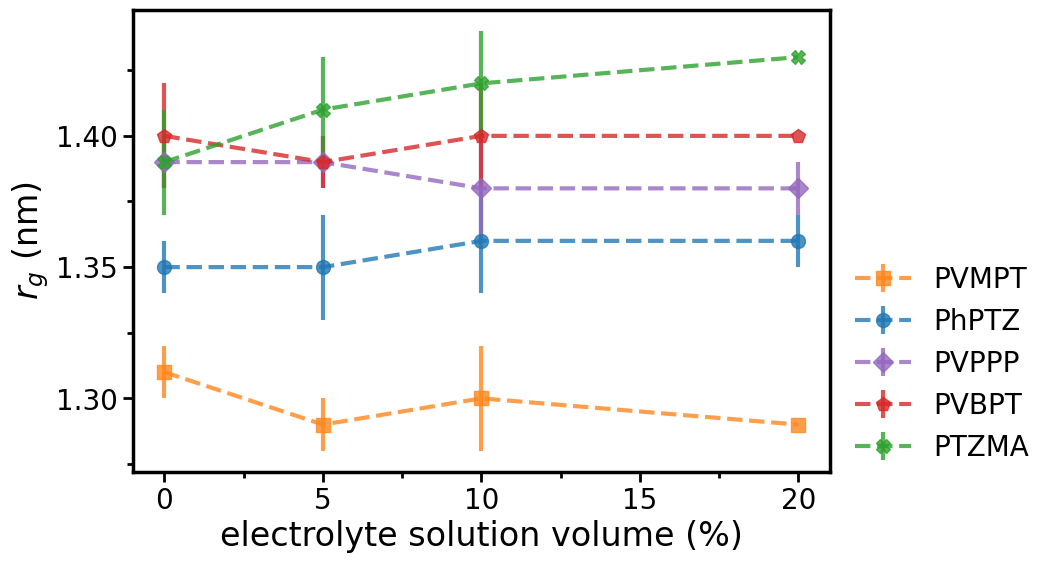

In [122]:
temp = "300K"

fig, ax = plt.subplots(figsize=(9, 6))

orange = '#FF871E'
blue = '#2178B4'
green = '#2EA12E'
purple = '#9568BD'
red = '#D6292A'

PhPTZ = df[df["Polymer"]=="PhPTZ"]
PVMPT = df[df["Polymer"]=="PVMPT"]
PTZMA = df[df["Polymer"]=="PTZMA"]
PVBPT = df[df["Polymer"]=="PVBPT"]
PVPPP = df[df["Polymer"]=="PVPPP"]

ax.errorbar(PVMPT["comp(%)"], PVMPT["Rg_avg"], PVMPT["Rg_err"], label="PVMPT",
             marker="s", alpha=0.8, lw=3, ms=10,ls="--", color=orange)
ax.errorbar(PhPTZ["comp(%)"], PhPTZ["Rg_avg"], PhPTZ["Rg_err"], label="PhPTZ",
             marker="o", alpha=0.8, lw=3, ms=10,ls="--", color=blue)
ax.errorbar(PVPPP["comp(%)"], PVPPP["Rg_avg"], PVPPP["Rg_err"], label="PVPPP",
             marker="D", alpha=0.8, lw=3, ms=10,ls="--", color=purple)
ax.errorbar(PVBPT["comp(%)"], PVBPT["Rg_avg"], PVBPT["Rg_err"], label="PVBPT",
             marker="p", alpha=0.8, lw=3, ms=10,ls="--", color=red)
ax.errorbar(PTZMA["comp(%)"], PTZMA["Rg_avg"], PTZMA["Rg_err"], label="PTZMA",
             marker="X", alpha=0.8, lw=3, ms=10,ls="--", color=green)

ax.set_xlabel("electrolyte solution volume (%)", fontsize=24)
ax.set_ylabel(r"$r_{g}$ (nm)", fontsize=24)
#ax.set_title("300K", fontsize=22, pad=10)

plt.legend(fontsize=20, bbox_to_anchor=(1, 0.5), frameon=False)


for spine in ax.spines.values():
    spine.set_linewidth(2.5)  # Makes the border thicker

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))  # Minor ticks every 10 units

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))  # Minor ticks every 5 units

ax.tick_params(axis='both', width=2.0, length=7, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2.0, length=4)

plt.savefig(f'/Users/mleyf/Documents/DMREF/Backbone study/Figures/rg_summary_{temp}.png', bbox_inches='tight', dpi=300)


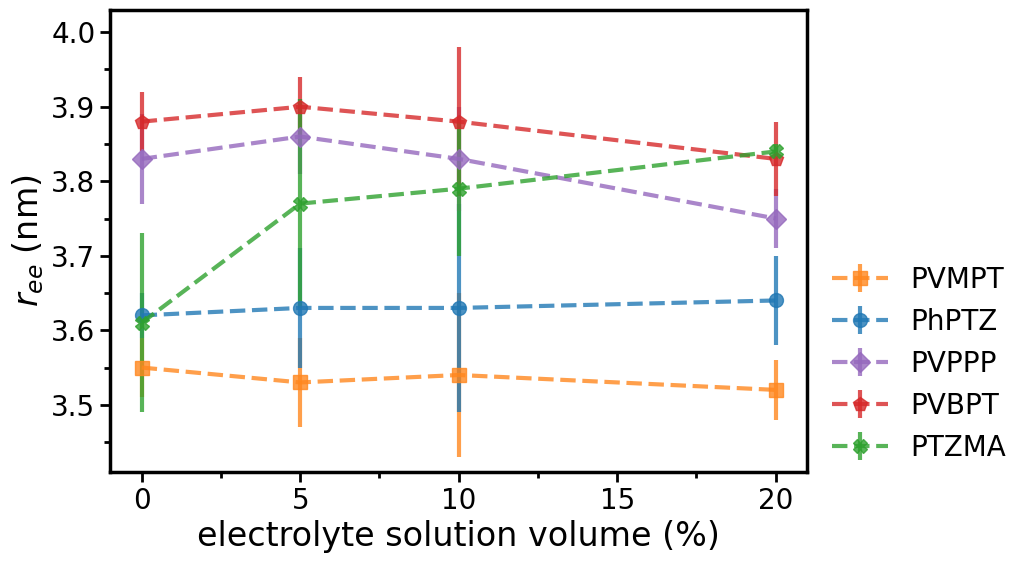

In [126]:
temp = "300K"

fig, ax = plt.subplots(figsize=(9, 6))

orange = '#FF871E'
blue = '#2178B4'
green = '#2EA12E'
purple = '#9568BD'
red = '#D6292A'

PhPTZ = df[df["Polymer"]=="PhPTZ"]
PVMPT = df[df["Polymer"]=="PVMPT"]
PTZMA = df[df["Polymer"]=="PTZMA"]
PVBPT = df[df["Polymer"]=="PVBPT"]
PVPPP = df[df["Polymer"]=="PVPPP"]

ax.errorbar(PVMPT["comp(%)"], PVMPT["r_ee_avg"], PVMPT["r_ee_err"], label="PVMPT",
             marker="s", alpha=0.8, lw=3, ms=10,ls="--", color=orange)
ax.errorbar(PhPTZ["comp(%)"], PhPTZ["r_ee_avg"], PhPTZ["r_ee_err"], label="PhPTZ",
             marker="o", alpha=0.8, lw=3, ms=10,ls="--", color=blue)
ax.errorbar(PVPPP["comp(%)"], PVPPP["r_ee_avg"], PVPPP["r_ee_err"], label="PVPPP",
             marker="D", alpha=0.8, lw=3, ms=10,ls="--", color=purple)
ax.errorbar(PVBPT["comp(%)"], PVBPT["r_ee_avg"], PVBPT["r_ee_err"], label="PVBPT",
             marker="p", alpha=0.8, lw=3, ms=10,ls="--", color=red)
ax.errorbar(PTZMA["comp(%)"], PTZMA["r_ee_avg"], PTZMA["r_ee_err"], label="PTZMA",
             marker="X", alpha=0.8, lw=3, ms=10,ls="--", color=green)

ax.set_xlabel("electrolyte solution volume (%)", fontsize=24)
ax.set_ylabel(r"$r_{ee}$ (nm)", fontsize=24)
ax.set_ylim(3.41, 4.03)
#ax.set_title("300K", fontsize=22, pad=10)

plt.legend(fontsize=20, bbox_to_anchor=(1, 0.5), frameon=False)


for spine in ax.spines.values():
    spine.set_linewidth(2.5)  # Makes the border thicker

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))  # Minor ticks every 10 units

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))  # Minor ticks every 5 units

ax.tick_params(axis='both', width=2.0, length=7, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2.0, length=4)

plt.savefig(f'/Users/mleyf/Documents/DMREF/Backbone study/Figures/e2e_summary_{temp}.png', bbox_inches='tight', dpi=300)
